In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

data = pd.read_csv(r"C:\Users\Alan\Desktop\python code\WIPMOVE\LK3.csv")
print(data.shape)
#data.head()
print(data)
#相關係數矩陣
print(data.corr())

(365, 7)
          Date         MA         MU      lost    standby    WIP   MOVE
0     2021/8/1  78.888333  50.033333  5.874167  22.980833   1012  13078
1     2021/8/2  79.345000  53.646667  8.325000  17.376667   1258  14934
2     2021/8/3  78.884167  48.614167  8.498333  21.770000   1112  13782
3     2021/8/4  79.151667  50.670833  9.719167  18.759167   1022  14192
4     2021/8/5  80.764167  51.430833  9.872500  19.456667   1422  14361
..         ...        ...        ...       ...        ...    ...    ...
360  2022/7/27  88.268229  72.192188  9.714063   6.366146  25792  32414
361  2022/7/28  88.183854  73.922917  9.388542   4.870833  27386  32279
362  2022/7/29  90.376042  79.209375  8.883854   2.287500  25082  34808
363  2022/7/30  88.385937  77.406250  8.429688   2.553646  20890  33955
364  2022/7/31  90.904687  81.284896  8.026042   1.596354  18972  36140

[365 rows x 7 columns]
               MA        MU      lost   standby       WIP      MOVE
MA       1.000000  0.660276  0.6970

In [3]:
# 檢查各欄位有無空值
data.isnull().sum() 

Date       0
MA         0
MU         0
lost       0
standby    0
WIP        0
MOVE       0
dtype: int64

0       1012
1       1258
2       1112
3       1022
4       1422
       ...  
360    25792
361    27386
362    25082
363    20890
364    18972
Name: WIP, Length: 365, dtype: int64
0      13078
1      14934
2      13782
3      14192
4      14361
       ...  
360    32414
361    32279
362    34808
363    33955
364    36140
Name: MOVE, Length: 365, dtype: int64


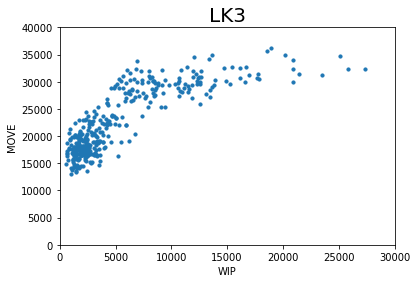

In [4]:
x = data['WIP']
y = data['MOVE']
print(x)
print(y)
# plot
plt.scatter(x,y,s=10)
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.title("LK3",fontsize=20)
plt.xlim(0,30000)
plt.ylim(0,40000)
plt.show()

predict (365,)
Accuracy:  0.838168802021112
Predict Values:  [24715.88888889]
Predict Values:  [30619.55555556]
Predict Values:  [29046.44444444]


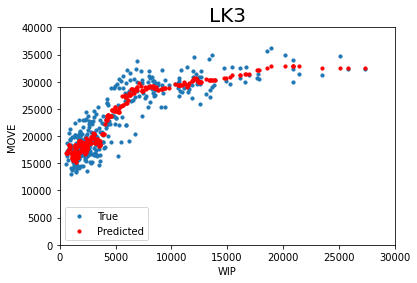

In [8]:
#拆分訓練測試 進行預測
# x = x.reshape(-1,1)
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# print(Y_train.shape)

# # 進行演算法流程
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor(n_neighbors=9)
# knn.fit(X_train, Y_train)
# # 得出預測結果(測試集)
# predicted= knn.predict(X_test)
# print('Accuracy: ',knn.score(X_test, Y_test))
# mse = metrics.mean_squared_error(Y_test, predicted)
# print('訓練集 MSE: ', mse)

# print('Predict Values: ',knn.predict([[80000]]))

# plt.scatter(X_train, Y_train, s=10, label='True')
# plt.scatter(X_test, predicted, color="r",s=10, label='Predicted')
# plt.xlabel('WIP')
# plt.ylabel('MOVE')
# plt.legend()
# plt.show()
#=========================================================================================================================

from unittest import result
from sklearn.neighbors import KNeighborsRegressor

x = x.reshape(-1,1)
# 建立KNN模型
knnModel = KNeighborsRegressor(n_neighbors=9)
# 使用訓練資料訓練模型
knnModel.fit(x,y)
# 使用訓練資料預測
predicted= knnModel.predict(x)
print('predict',predicted.shape)
print('Accuracy: ',knnModel.score(x,y))
print('Predict Values: ',knnModel.predict([[5000]]))
print('Predict Values: ',knnModel.predict([[12000]]))
print('Predict Values: ',knnModel.predict([[10000]]))



# plot
plt.scatter(x, y, s=10, label='True')
plt.scatter(x, predicted, color="r",s=10, label='Predicted')
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.title('Dry Etch')
plt.title("LK3",fontsize=20)
plt.xlim(0,30000)
plt.ylim(0,40000)
plt.legend()
plt.show()

In [81]:
from scipy.stats import linregress
x = [5000,10000]
y = [24895, 28065]

slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(slope)
print(intercept)




0.634
21725.0


In [10]:
#標準化資料
from sklearn.preprocessing import MinMaxScaler

y = y.values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(y)
x_scaled = scaler.transform(x)
y_scaled = scaler.transform(y)
print('資料集 X 的平均值 : ', x.mean(axis=0))
print('資料集 X 的標準差 : ', x.std(axis=0))
print('標準化後資料集 X 的平均值 : ', x_scaled.mean(axis=0))
print('標準化後後資料集 X 的標準差 : ', x_scaled.std(axis=0))
print('==========================================================')
print('資料集 Y 的平均值 : ', y.mean(axis=0))
print('資料集 Y 的標準差 : ', y.std(axis=0))
print('標準化後資料集 Y 的平均值 : ', y_scaled.mean(axis=0))
print('標準化後後資料集 Y 的標準差 : ', y_scaled.std(axis=0))
print(x_scaled.shape)

資料集 X 的平均值 :  [5366.83561644]
資料集 X 的標準差 :  [4972.67994286]
標準化後資料集 X 的平均值 :  [-0.33436668]
標準化後後資料集 X 的標準差 :  [0.21562223]
資料集 Y 的平均值 :  [22474.19178082]
資料集 Y 的標準差 :  [5943.77024404]
標準化後資料集 Y 的平均值 :  [0.40743178]
標準化後後資料集 Y 的標準差 :  [0.25773004]
(365, 1)


Accuracy:  0.8828770914518236
 MSE:  0.0077798628352754645
Predict Values:  [[0.87108664]]


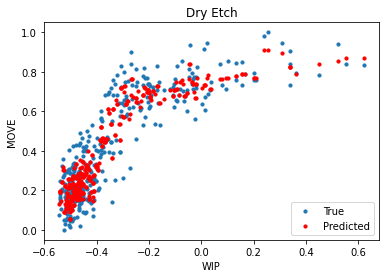

In [11]:
from sklearn.neighbors import KNeighborsRegressor

x_scaled = x_scaled.reshape(-1,1)
# 建立KNN模型
knnModel = KNeighborsRegressor(n_neighbors=3)
# 使用訓練資料訓練模型
knnModel.fit(x_scaled,y_scaled)
# 使用訓練資料預測
predicted= knnModel.predict(x_scaled)
print('Accuracy: ',knnModel.score(x_scaled,y_scaled))
mse = metrics.mean_squared_error(y_scaled, predicted)
print(' MSE: ', mse)
print('Predict Values: ',knnModel.predict([[80000]]))
# plot
plt.scatter(x_scaled, y_scaled, s=10, label='True')
plt.scatter(x_scaled, predicted, color="r",s=10, label='Predicted')
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.title('Dry Etch')
plt.legend()
plt.show()

In [14]:
#摘分訓練集測試集
X=x_scaled
Y=y_scaled
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(Y_train.shape)



(273, 1)


In [15]:
# 進行演算法流程
knn = KNeighborsRegressor(n_neighbors=8)
# 訓練資料
knn.fit(X_train, Y_train)
# 得出預測結果(測試集)
predicted= knn.predict(X_test)
print('Accuracy: ',knn.score(X_test, Y_test))
mse = metrics.mean_squared_error(Y_test, predicted)
print('訓練集 MSE: ', mse)

print('Predict Values: ',knn.predict([[80000]]))

Accuracy:  0.8170949647592177
訓練集 MSE:  0.010397823060770283
Predict Values:  [[0.84750889]]


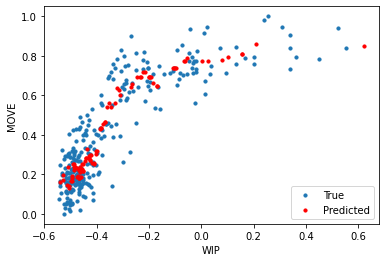

In [16]:
# plot
plt.scatter(X_train, Y_train, s=10, label='True')
plt.scatter(X_test, predicted, color="r",s=10, label='Predicted')
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.legend()
plt.show()